In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("train_dataset.csv")

# Drop any rows with missing values
data.dropna(inplace=True)

# Convert the "smoking" column to binary (0 for non-smoker, 1 for smoker)
data["smoking"] = np.where(data["smoking"] == 1, 1, 0)




smoking                1.000000
hemoglobin             0.401206
height(cm)             0.394314
weight(kg)             0.299347
triglyceride           0.251057
Gtp                    0.240274
waist(cm)              0.223359
serum creatinine       0.212473
HDL                    0.179509
age                    0.166268
dental caries          0.107601
relaxation             0.103663
fasting blood sugar    0.099908
ALT                    0.098615
systolic               0.070176
dtype: float64


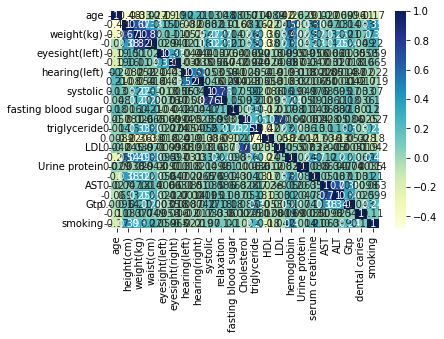

In [3]:
import seaborn as sns

# Calculate the Pearson correlation coefficients between each feature and the target variable
correlations = data.corrwith(data["smoking"])

# Sort the correlations in descending order and print the top 10 features
sorted_correlations = correlations.abs().sort_values(ascending=False)
print(sorted_correlations.head(15))

# Plot a heatmap of the correlations between all pairs of features
sns.heatmap(data.corr(), annot=False, cmap="YlGnBu")

# Select the top 10 features based on their correlation with the target variable
top_features = sorted_correlations.index[:15]

# Create a new dataframe with only the top 10 features
X_top = data[top_features]


In [4]:
X= X_top.drop('smoking',axis=1)
y=X_top['smoking']


In [5]:
# Standardize the top 10 features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (using the top 10 features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets (using the top 10 features)
print("X_train_top shape:", X_train.shape)
print("X_test_top shape:", X_test.shape)

X_train_top shape: (31187, 14)
X_test_top shape: (7797, 14)


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

# B. Support Vector Machines (SVM)
# Define the parameter grid for the grid search
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}

# Train the model using grid search
svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm.predict(X_test)

# Evaluate the model using accuracy, confusion matrix, and classification report
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm)
print("Support Vector Machines Accuracy:", acc_svm)
print("Support Vector Machines Confusion Matrix:\n", cm_svm)
print("Support Vector Machines Classification Report:\n", cr_svm)

# C. Random Forest
# Define the parameter grid for the grid search
param_grid_rf = {'n_estimators': [50, 100, 150], 'criterion': ['gini']}

# Train the model using grid search
rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model using accuracy, confusion matrix, and classification report
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
print("Random Forest Classification Report:\n", cr_rf)

Support Vector Machines Accuracy: 0.7588816211363345
Support Vector Machines Confusion Matrix:
 [[4000  975]
 [ 905 1917]]
Support Vector Machines Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4975
           1       0.66      0.68      0.67      2822

    accuracy                           0.76      7797
   macro avg       0.74      0.74      0.74      7797
weighted avg       0.76      0.76      0.76      7797



NameError: name 'RandomForestClassifier' is not defined